# Частина друга: Аналіз файлів

Проведіть аналіз файлу 2017_jun_final.csv. Файл містить результати опитування розробників у червні 2017 року.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv

In [2]:
url = 'https://drive.google.com/uc?id=1JMYqXipZpz9Y5-vyxvLEO2Y1sRBxqu-U'

table = pd.read_csv(url)

- Прочитайте отриману таблицю, використовуючи метод head

In [3]:
print(table.head())

   N                 Должность Язык.программирования Специализация  \
0  1        Junior QA engineer                   NaN     Manual QA   
1  2        Junior QA engineer                   NaN     Manual QA   
2  3         Software Engineer               C#/.NET           NaN   
3  4         Software Engineer            JavaScript           NaN   
4  5  Senior Software Engineer            JavaScript           NaN   

  Общий.опыт.работы Опыт.работы.на.текущем.месте  Зарплата.в.месяц  \
0               0.5                          0.5               400   
1  меньше 3 месяцев             меньше 3 месяцев               430   
2                 4                            1              2500   
3                 5                            4              2000   
4    10 и более лет                          0.5              4500   

   Изменение.зарплаты.за.12.месяцев    Город     Размер.компании  ...  \
0                                 0  Харьков       до 10 человек  ...   
1           

- Визначте розмір таблиці за допомогою методу shape

In [4]:
rows, columns = table.shape

print("Rows:", rows)
print("Columns:", columns)

Rows: 8704
Columns: 25


- Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [5]:
column_types = table.dtypes

print(column_types)

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

- Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [6]:
missing_values_ratio = table.isnull().sum() / len(table) * 100

print(missing_values_ratio)

N                                    0.000000
Должность                            0.000000
Язык.программирования               44.232537
Специализация                       82.938879
Общий.опыт.работы                    0.000000
Опыт.работы.на.текущем.месте         0.000000
Зарплата.в.месяц                     0.000000
Изменение.зарплаты.за.12.месяцев     0.000000
Город                                0.000000
Размер.компании                      0.000000
Тип.компании                         0.000000
Пол                                  0.000000
Возраст                              0.000000
Образование                          0.000000
Университет                          4.113051
Еще.студент                          0.000000
Уровень.английского                  0.000000
Предметная.область                   2.562040
Дата.заполнения                      0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp                   

- Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"

In [7]:
table = pd.concat([table.dropna(axis=1), table["Язык.программирования"]], axis=1)

print(table.head())

   N                 Должность Общий.опыт.работы Опыт.работы.на.текущем.месте  \
0  1        Junior QA engineer               0.5                          0.5   
1  2        Junior QA engineer  меньше 3 месяцев             меньше 3 месяцев   
2  3         Software Engineer                 4                            1   
3  4         Software Engineer                 5                            4   
4  5  Senior Software Engineer    10 и более лет                          0.5   

   Зарплата.в.месяц  Изменение.зарплаты.за.12.месяцев    Город  \
0               400                                 0  Харьков   
1               430                               130  Харьков   
2              2500                               800     Киев   
3              2000                               400   Одесса   
4              4500                               500   Другой   

      Размер.компании    Тип.компании      Пол  Возраст           Образование  \
0       до 10 человек  Аутсорсингов

- Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування"

In [8]:
missing_values_ratio = table.isnull().sum() / len(table) * 100

print(missing_values_ratio)

N                                    0.000000
Должность                            0.000000
Общий.опыт.работы                    0.000000
Опыт.работы.на.текущем.месте         0.000000
Зарплата.в.месяц                     0.000000
Изменение.зарплаты.за.12.месяцев     0.000000
Город                                0.000000
Размер.компании                      0.000000
Тип.компании                         0.000000
Пол                                  0.000000
Возраст                              0.000000
Образование                          0.000000
Еще.студент                          0.000000
Уровень.английского                  0.000000
Дата.заполнения                      0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp                      0.000000
salary                               0.000000
Язык.программирования               44.232537
dtype: float64


- Видаліть усі рядки у вихідній таблиці за допомогою методу dropna

In [9]:
table = table.dropna(axis=0)

print(table.head())

   N                 Должность Общий.опыт.работы Опыт.работы.на.текущем.месте  \
2  3         Software Engineer                 4                            1   
3  4         Software Engineer                 5                            4   
4  5  Senior Software Engineer    10 и более лет                          0.5   
6  7  Junior Software Engineer                 1             меньше 3 месяцев   
7  8  Senior Software Engineer                 6                            1   

   Зарплата.в.месяц  Изменение.зарплаты.за.12.месяцев        Город  \
2              2500                               800         Киев   
3              2000                               400       Одесса   
4              4500                               500       Другой   
6               600                               100  Хмельницкий   
7              3300                               500         Киев   

   Размер.компании    Тип.компании      Пол  Возраст         Образование  \
2  до 1000 челов

- Визначте новий розмір таблиці за допомогою методу shape

In [10]:
rows, columns = table.shape

print("Rows:", rows)
print("Columns:", columns)

Rows: 4854
Columns: 20


- Створіть нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python

In [11]:
python_data = table[table['Язык.программирования'] == 'Python']

print(python_data.head())

       N                 Должность Общий.опыт.работы  \
12    13         Software Engineer                 1   
68    69         Software Engineer               1.5   
87    88  Junior Software Engineer               0.5   
114  115  Junior Software Engineer               1.5   
143  144  Junior Software Engineer                 1   

    Опыт.работы.на.текущем.месте  Зарплата.в.месяц  \
12              меньше 3 месяцев               800   
68                           0.5               900   
87                           0.5               600   
114                          0.5               685   
143                            1               750   

     Изменение.зарплаты.за.12.месяцев Город  Размер.компании    Тип.компании  \
12                                200  Киев    до 50 человек  Аутсорсинговая   
68                                900  Киев    до 10 человек         Стартап   
87                                  0  Киев    до 10 человек  Аутсорсинговая   
114               

- Визначте розмір таблиці python_data за допомогою методу shape

In [12]:
rows, columns = python_data.shape

print("Rows:", rows)
print("Columns:", columns)

Rows: 207
Columns: 20


- Використовуючи метод groupby, виконайте групування за стовпчиком "Посада"

In [13]:
grouped_data = python_data.groupby('Должность')

for name, group in grouped_data:
    print("Position:", name)
    print(group.head())

Position: Junior Software Engineer
       N                 Должность Общий.опыт.работы  \
87    88  Junior Software Engineer               0.5   
114  115  Junior Software Engineer               1.5   
143  144  Junior Software Engineer                 1   
162  163  Junior Software Engineer               0.5   
171  172  Junior Software Engineer              0.25   

    Опыт.работы.на.текущем.месте  Зарплата.в.месяц  \
87                           0.5               600   
114                          0.5               685   
143                            1               750   
162                          0.5               500   
171                         0.25               800   

     Изменение.зарплаты.за.12.месяцев    Город  Размер.компании  \
87                                  0     Киев    до 10 человек   
114                               250     Киев  до 1000 человек   
143                               250     Киев    до 10 человек   
162                                

- Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу agg і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"

In [14]:
aggregated_data = python_data.groupby('Должность').agg({'Зарплата.в.месяц': ['min', 'max']})

print(aggregated_data)

                         Зарплата.в.месяц      
                                      min   max
Должность                                      
Junior Software Engineer              100  1250
Senior Software Engineer             1300  9200
Software Engineer                     500  5400
System Architect                     3000  5000
Technical Lead                       1425  6200


- Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць. Використовуйте її для методу apply та створіть новий стовпчик "avg"

In [15]:
def fill_avg_salary(salary):
    return str(int(salary.mean()))

aggregated_data['avg'] = aggregated_data.apply(fill_avg_salary, axis=1)
aggregated_data = aggregated_data.reset_index()
aggregated_data.columns = ['Position', 'min', 'max', 'avg']

print(aggregated_data.head())

                   Position   min   max   avg
0  Junior Software Engineer   100  1250   675
1  Senior Software Engineer  1300  9200  5250
2         Software Engineer   500  5400  2950
3          System Architect  3000  5000  4000
4            Technical Lead  1425  6200  3812


- Створіть описову статистику за допомогою методу describe для нового стовпчика.

In [16]:
avg_stats = aggregated_data['avg'].describe()

print(avg_stats)

count       5
unique      5
top       675
freq        1
Name: avg, dtype: object


- Збережіть отриману таблицю в CSV файл

In [17]:
aggregated_data.to_csv('salary.csv', index=False)
print(pd.read_csv('salary.csv'))

                   Position   min   max   avg
0  Junior Software Engineer   100  1250   675
1  Senior Software Engineer  1300  9200  5250
2         Software Engineer   500  5400  2950
3          System Architect  3000  5000  4000
4            Technical Lead  1425  6200  3812


### Chart 1
Залежність зарплати від стажу

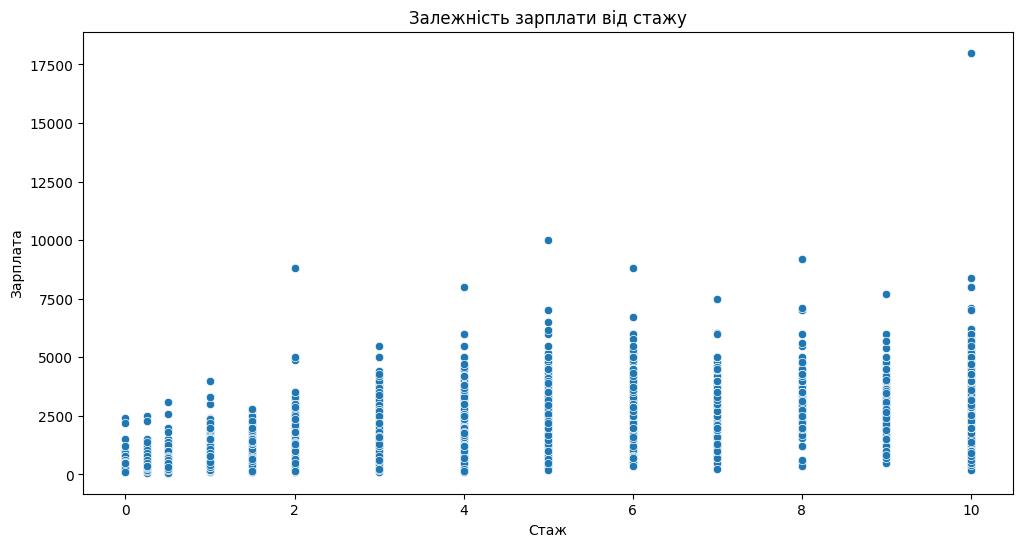

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(data=table, x="exp", y="salary")
plt.xlabel("Стаж")
plt.ylabel("Зарплата")
plt.title("Залежність зарплати від стажу")
plt.show()

### Chart 2
Розподіл зарплати


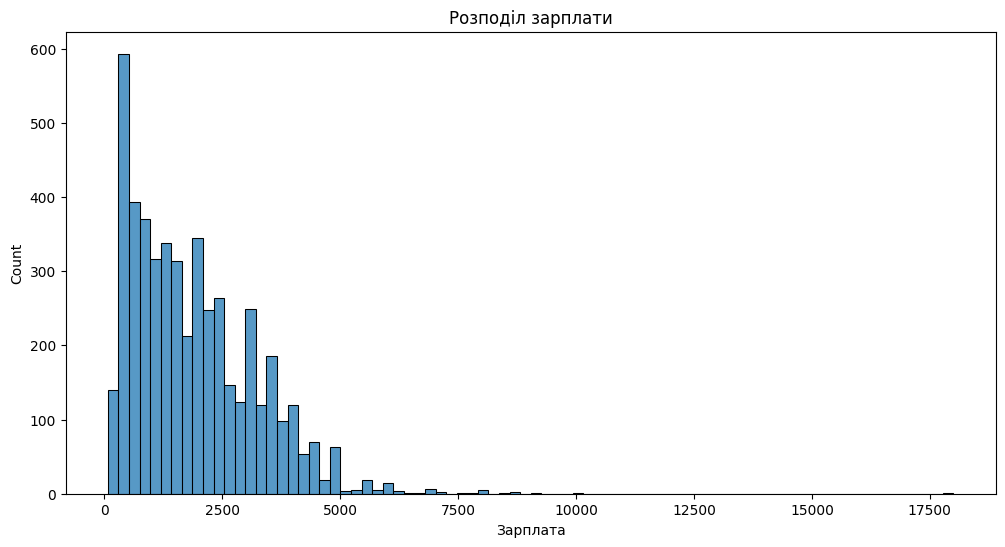

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(table["salary"])
plt.xlabel("Зарплата")
plt.title("Розподіл зарплати")
plt.show()

### Chart 3
Кількість розробників за мовою програмування

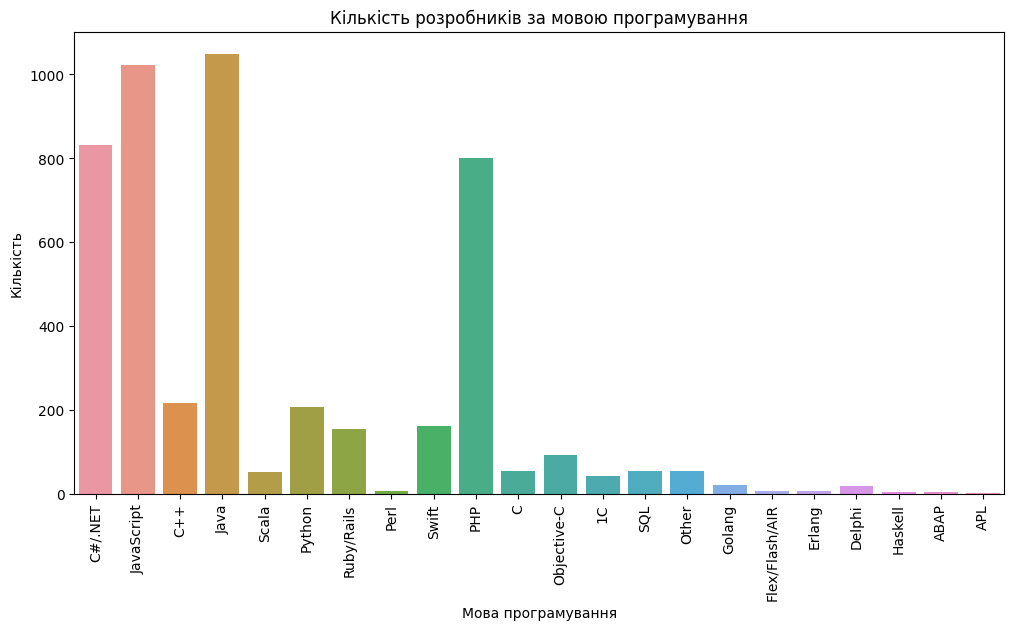

In [20]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=table, x="Язык.программирования")
plt.xlabel("Мова програмування")
plt.ylabel("Кількість")
plt.title("Кількість розробників за мовою програмування")
plt.xticks(rotation=90)
plt.show()

### Chart 4
Матриця кореляції

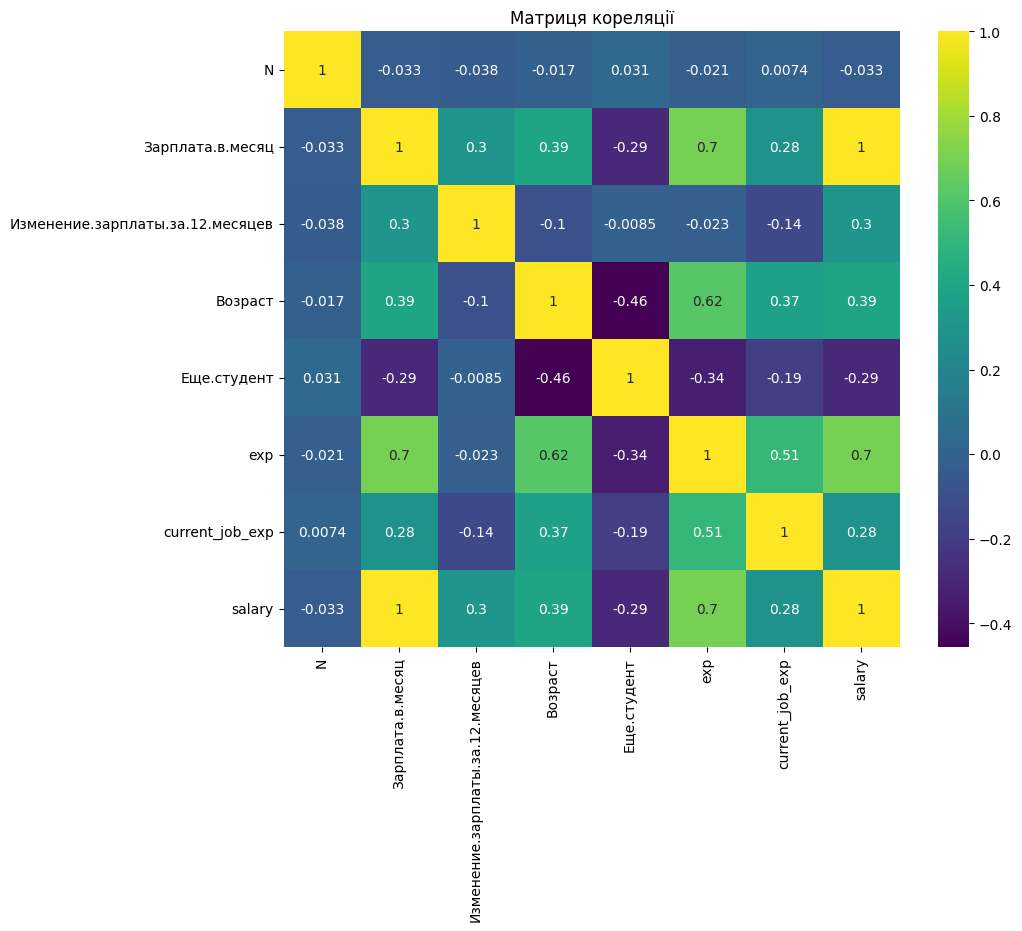

In [21]:
correlation_matrix = table.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', square=True)
plt.title("Матриця кореляції")
plt.show()